In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
medicamentos=pd.read_excel("medicamentos_limpio_15jun.xlsx")
medicamentos.FECHA_EMISION=pd.to_datetime(medicamentos.FECHA_EMISION)

In [3]:
medicamentos.iloc[:,:]

,ID_PACIENTE,FECHA_EMISION,REGIONAL_EPS_DESC,CODIGO_PRESTACION_OP,NOMBRE_MEDICAMENTO,CODIGO_DIAGNOSTICO_EPS_OP,DIAGNOSTICO_EPS_DESC,NUMERO_CANTIDAD_PRESTACIONES,NumeroCantidadPrestacionesImputado,NumeroCantidadPrestacionesImputadoInd,DiagnosticoAgrupadoRel,Categoria,Tratamiento
0,940545,2020-02-25,Medellin,M025848,TACROLIMUS MONOHIDRATADO -INDICACIONES DIFEREN...,L309,"DERMATITIS, NO ESPECIFICADA",1.0,1.0,0,NaN,NaN,NaN
1,725649,2020-02-26,Medellin,M029434,MONTELUKAST/LEVOCETIRIZINA DIHIDROCLORURO,J304,"RINITIS ALÉRGICA, NO ESPECIFICADA",28.0,28.0,0,RINITIS ALERGICA,MONTELUKAST,Oral
2,535255,2020-02-27,Medellin,M026578,FLUTICASONA PROPIONATO/SALMETEROL,D848,OTRAS INMUNODEFICIENCIAS ESPECIFICADAS,1.0,1.0,0,NaN,FLUTICASONA,Inhaladores Mantenimiento
3,1127795,2020-02-28,Medellin,M004049,DOXICICLINA,N760,VAGINITIS AGUDA,28.0,28.0,0,NaN,NaN,NaN
4,1673566,2020-02-25,Medellin,M280151,BECLOMETASONA NASAL,Z929,HISTORIA PERSONAL DE TRATAMIENTO MÉDICO NO ESP...,1.0,1.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
109591,535255,2019-11-27,Medellin,M284026,DOMPERIDONA,D848,OTRAS INMUNODEFICIENCIAS ESPECIFICADAS,270.0,270.0,0,NaN,NaN,NaN
109592,1589082,2019-11-12,Medellin,M022950,SUCRALOSA,E106,"DIABETES MELLITUS INSULINODEPENDIENTE, CON OTR...",300.0,300.0,0,NaN,NaN,NaN
109593,978163,2019-11-06,Medellin,M019032,LIPASA/AMILASA/PROTEASA,E840,FIBROSIS QUÍSTICA CON MANIFESTACIONES PULMONARES,300.0,300.0,0,NaN,NaN,NaN
109594,978163,2019-12-03,Medellin,M019032,LIPASA/AMILASA/PROTEASA,E840,FIBROSIS QUÍSTICA CON MANIFESTACIONES PULMONARES,300.0,300.0,0,NaN,NaN,NaN


In [4]:
## esta función toma un registro de medicamento y regresa la marcación con respecto a 
## adherencia, si es una continuación del mismo medicamento retorna un dataframe de pandas 
## de una sola fila

def marca_fila(ID_PACIENTE,FECHA_EMISION,NombreAdherencia,
               NUMERO_CANTIDAD_PRESTACIONES,base_med=medicamentos,
              columna="NOMBRE_MEDICAMENTO",tolerancia_dias=5):
    #los input corresponden a campos de la tabla Medicamentos, Frecuencia_Diaria es la cantidad 
    #de ese medicamento si la aplicacion fuera diaria, ej si es un inhalador al mes usar 1, si es un
    # si es una aplicacion diaria usar 30
    # base med es la base donde se realiza la busqueda
    # Fecha Emision formato datetime de pandas
    #_Fecha_Fin_=FECHA_EMISION+30*NUMERO_CANTIDAD_PRESTACIONES/Frecuencia_Mensual*timedelta(days=1)
    #_Fecha_Fin_inf_=_Fecha_Fin_-timedelta(days=tolerancia_dias)
    #_Fecha_Fin_sup_=_Fecha_Fin_+timedelta(days=tolerancia_dias)
    _filtro_fin_med_=(base_med.ID_PACIENTE==ID_PACIENTE) &(base_med["FECHA_EMISION"]>FECHA_EMISION)
    _filtro_fin_med_=_filtro_fin_med_ &(base_med[columna]==NombreAdherencia)
    _medicamentos_local_=base_med[_filtro_fin_med_]
    _fecha_prox_formula_=_medicamentos_local_.loc[base_med.ID_PACIENTE==ID_PACIENTE,"FECHA_EMISION"].min()
    _tiempo_entre_form_=(_fecha_prox_formula_-FECHA_EMISION).days
    if _medicamentos_local_.shape[0]==0:
        ## marca como no adherente 
        _adherencia_=0
        _comentario_="ultimo registro"
        #print("No adherente")
        pass
    elif _tiempo_entre_form_<=NUMERO_CANTIDAD_PRESTACIONES+tolerancia_dias:
        ## marca como adherente marca continuidad medicamento
        #print("Adherente, Continuidad")
        _adherencia_=1
        _comentario_="adherente"
        pass
    else:
        ## marca como aderente no continuidad del medicamento
        #print("Adherente, No Continuidad")
        _adherencia_=0
        _comentario_="no adherente"
        pass
    #print(_medicamentos_local_)
    _return_=pd.Series({"ID_PACIENTE":ID_PACIENTE,
                           "FECHA_EMISION":FECHA_EMISION,
                        "FechaSiguienteRecla":_fecha_prox_formula_,
                           columna:NombreAdherencia,
                          "AdherenciaMed":_adherencia_,
                          "Comentario":_comentario_,
                       "TiempoEntreFormulas":_tiempo_entre_form_,
                        "NUMERO_CANTIDAD_PRESTACIONES":NUMERO_CANTIDAD_PRESTACIONES})
    return _return_
    
    

In [5]:
marca_fila(medicamentos.ID_PACIENTE[1],medicamentos.FECHA_EMISION[1],medicamentos.Categoria[1],
           medicamentos.NUMERO_CANTIDAD_PRESTACIONES[1],columna="Categoria")

ID_PACIENTE                                  725649
FECHA_EMISION                   2020-02-26 00:00:00
FechaSiguienteRecla             2020-04-01 00:00:00
Categoria                               MONTELUKAST
AdherenciaMed                                     0
Comentario                             no adherente
TiempoEntreFormulas                              35
NUMERO_CANTIDAD_PRESTACIONES                     28
dtype: object

In [6]:
## Esta funcion toma un dataframe y añade las columnas necesarias al mismo
## oportunidad de mejora un diccionario de las prestaciones con la frecuencia 
## de medicacion
def procesa_medicamentos_df(base_med=medicamentos,columna="NOMBRE_MEDICAMENTO",NombreAdherencia="MONTELUKAST",
                           tolerancia_dias=5):
    _work_base_=base_med[base_med[columna]==NombreAdherencia]
    _adherencia_=_work_base_.apply(lambda x:marca_fila(x.ID_PACIENTE,
                                   x.FECHA_EMISION,
                                   NombreAdherencia,
                                   x.NUMERO_CANTIDAD_PRESTACIONES,
                                   _work_base_,
                                   columna,
                                    tolerancia_dias) ,axis=1)
    #_adherencia_=_adherencia_.loc[:,["adherencia_med","comentario"]]
    #_return_=pd.concat([df,_adherencia_],axis=1)
    return _adherencia_

In [151]:
medicamentos.Categoria.drop_duplicates()

0               NaN
1       MONTELUKAST
2       FLUTICASONA
10       BUDESONIDA
12       OMALIZUMAB
24        TIOTROPIO
25     FEXOFENADINA
59       SALBUTAMOL
79        BILASTINA
81     BENRALIZUMAB
144      MOMETASONA
292     MEPOLIZUMAB
537    PREDNISOLONA
Name: Categoria, dtype: object

In [26]:

_base_=procesa_medicamentos_df(columna="Categoria",NombreAdherencia="BUDESONIDA")
    

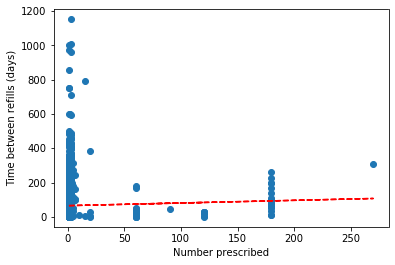

In [27]:
#_base_.columns

plt.figure()
x=_base_.NUMERO_CANTIDAD_PRESTACIONES
y=_base_.TiempoEntreFormulas
plt.scatter(x,y)
plt.xlabel("Number prescribed")
plt.ylabel("Time between refills (days)")
filtro=(-np.isnan(x))&(-np.isnan(y))
z = np.polyfit(x[filtro], y[filtro], 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

In [28]:
reg=LinearRegression().fit(x[filtro].values.reshape(-1, 1), y[filtro].values.reshape(-1, 1))


In [29]:
reg.coef_

array([[0.15484238]])

In [30]:
reg.intercept_

array([66.62331504])

2           1.0
10          1.0
11          1.0
13          1.0
16          1.0
          ...  
109435    120.0
109515    120.0
109535    120.0
109553    150.0
109583    180.0
Name: NUMERO_CANTIDAD_PRESTACIONES, Length: 11940, dtype: float64

In [9]:
adherencia=pd.read_excel("/mnt/Storage/ds4a/Proyecto Omnivida/datos originales/Adherencia.xlsx")

In [16]:
adherencia["mm"]=1
adherencia["NUMERO_CANTIDAD_PRESTACIONES"]=1
adherencia["FECHA_EMISION"]=adherencia["FE_ENTREVISTA"]
adherencia["ID_PACIENTE"]=adherencia['ds_identificacion']





In [18]:
abc=procesa_medicamentos_df(base_med=adherencia,columna="mm",NombreAdherencia=1)

In [19]:
abc.to_excel("Adherecnia_dias.xlsx")

(array([3.10e+03, 8.26e+02, 2.92e+02, 1.17e+02, 4.20e+01, 2.00e+01,
        1.00e+01, 5.00e+00, 2.00e+00, 4.00e+00]),
 array([1.0000e+00, 2.3390e+02, 4.6680e+02, 6.9970e+02, 9.3260e+02,
        1.1655e+03, 1.3984e+03, 1.6313e+03, 1.8642e+03, 2.0971e+03,
        2.3300e+03]),
 <a list of 10 Patch objects>)

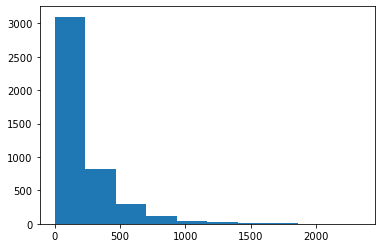

In [23]:
plt.hist(abc[~pd.isna(abc["TiempoEntreFormulas"])]["TiempoEntreFormulas"])

In [24]:
abc2=abc[abc["TiempoEntreFormulas"]<361]

In [25]:
abc["TiempoEntreFormulas"].mean()

205.75350837483023

In [26]:
abc2["TiempoEntreFormulas"].mean()

117.2450495049505

(array([853., 660., 529., 431., 277., 244., 214., 173., 131., 124.]),
 array([  1. ,  36.9,  72.8, 108.7, 144.6, 180.5, 216.4, 252.3, 288.2,
        324.1, 360. ]),
 <a list of 10 Patch objects>)

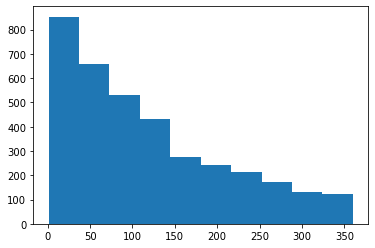

In [27]:
plt.hist(abc2[~pd.isna(abc2["TiempoEntreFormulas"])]["TiempoEntreFormulas"])